# Question 01

In [ ]:
import math
import matplotlib.pyplot as plt

Optimal price: 20.55621


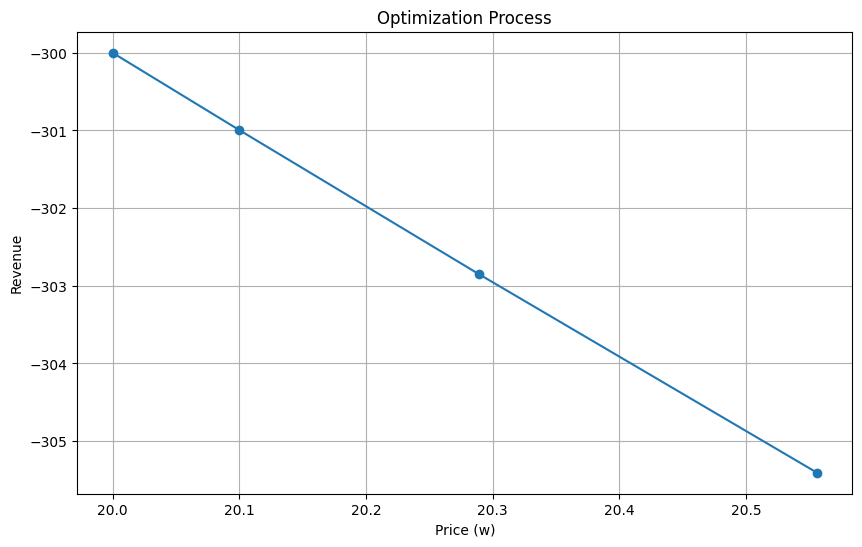

In [8]:
# Objective function
def revenue(w):
    return 0.5 * w**2 - 30 * w + 100

# Gradient of the objective function
def gradient(w):
    return w - 30

# Hyperparameters
learning_rate = 0.1
momentum = 0.9
iterations = 3

# Initial price
w = 20

# Initialize velocity
v = 0

# Lists to store optimization history for visualization
w_history = [w]
revenue_history = [revenue(w)]

for i in range(iterations):
    v = momentum * v + (1 - momentum) * gradient(w)
    w -= learning_rate * v
    w_history.append(w)
    revenue_history.append(revenue(w))

print("Optimal price:", w)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(w_history, revenue_history, marker='o', linestyle='-')
plt.title('Optimization Process')
plt.xlabel('Price (w)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


# Question - 2


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/diabetes.csv")
df.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values.

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.shape

(768, 9)

In [16]:
# Numerical features

df.describe(exclude=['O'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


No categorical columns, so no need for hot encoding

In [18]:
#lib for model building & eval
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [19]:
# split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Base Model

In [21]:
# neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
# model.complie
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
# model train
hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


In [24]:
# model eval
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", recall)
print("F1 Score:", f1)

5/5 [==============================] - 0s 4ms/step
Accuracy: 0.6298701298701299
Precision: 0.4722222222222222
Recall: 0.3090909090909091
F1 Score: 0.37362637362637363


In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[80 19]
 [38 17]]


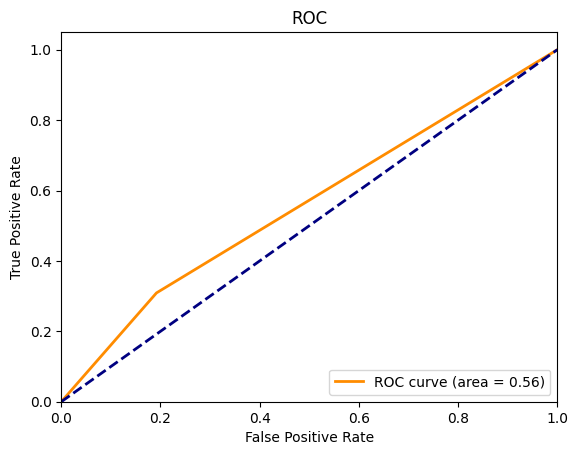

In [27]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

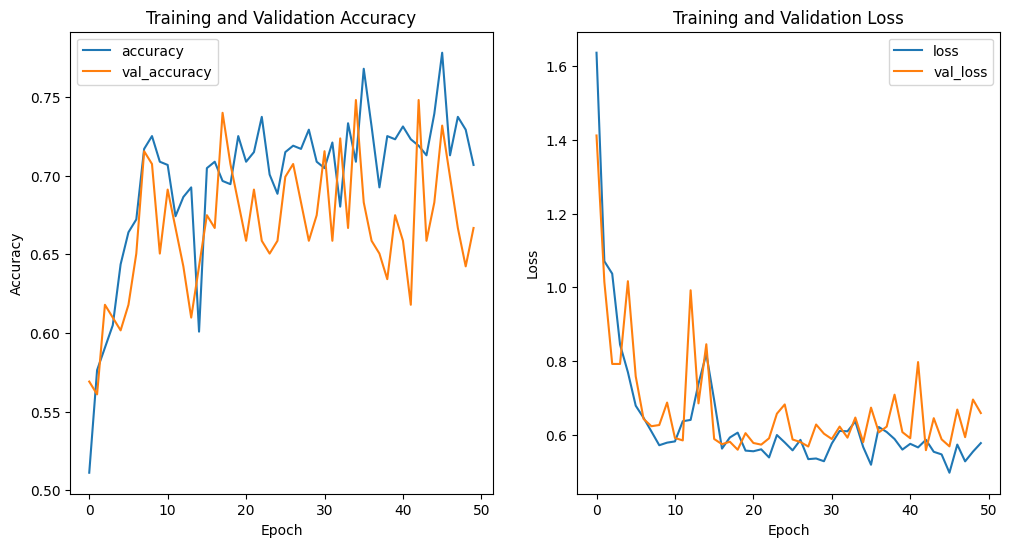

In [29]:
# Learning Curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

User defined code for evaluation, Conf matrix, ROC curve, Learning curve for reusability.

In [34]:
# Evaluate the performance of models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

In [61]:
# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.show()

In [38]:
# ROC Curve
def plot_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [39]:
# Learning Curves
def plot_learning_curves(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

L1 Model

In [31]:
# L1 regularization
model_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
# model
model_l1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [33]:
# Train
hist_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


In [41]:
#eval
accuracy_l1, precision_l1, recall_l1, f1_l1 = evaluate_model(model_l1, X_test, y_test)
print("L1 Regularization:")
print("Accuracy:", accuracy_l1)
print("Precision:", precision_l1)
print("Recall:", recall_l1)
print("F1 Score:", f1_l1)

5/5 [==============================] - 0s 4ms/step
L1 Regularization:
Accuracy: 0.6688311688311688
Precision: 0.5416666666666666
Recall: 0.4727272727272727
F1 Score: 0.5048543689320388



Confusion Matrix - L1 Regularization:
5/5 [==============================] - 0s 2ms/step


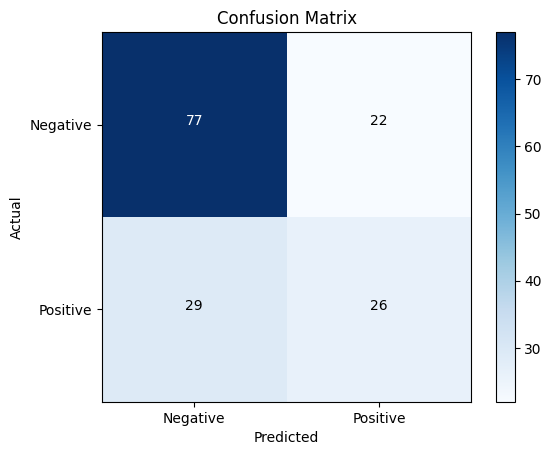

In [62]:
print("\nConfusion Matrix - L1 Regularization:")
plot_confusion_matrix(model_l1, X_test, y_test)


ROC Curve - L1 Regularization:
5/5 [==============================] - 0s 3ms/step


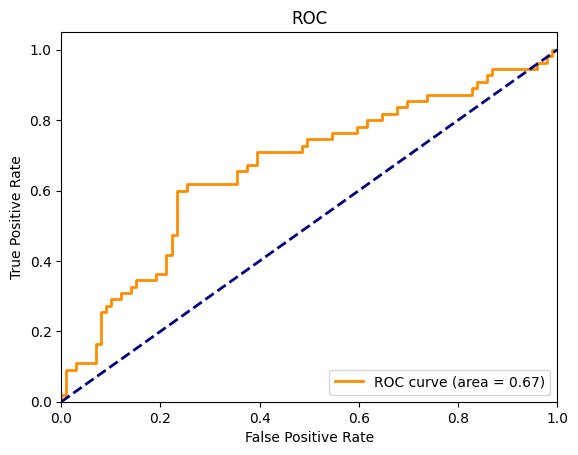

In [45]:
print("\nROC Curve - L1 Regularization:")
plot_roc_curve(model_l1, X_test, y_test)


Learning Curves - L1 Regularization:


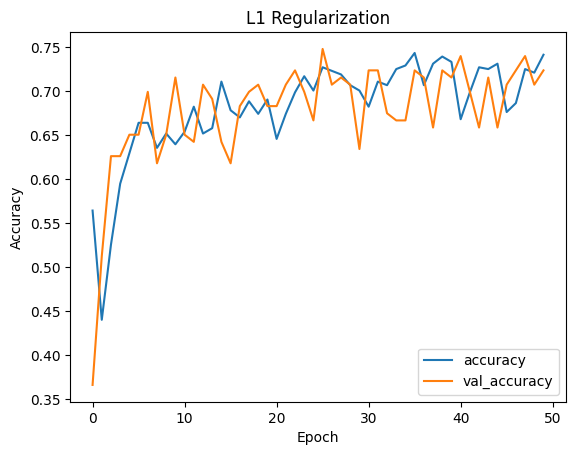

In [47]:
print("\nLearning Curves - L1 Regularization:")
plot_learning_curves(hist_l1, "L1 Regularization")

L2

In [42]:
# L2 regularization
model_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model
model_l2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [43]:
# Train
hist_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


In [48]:
#eval
accuracy_l2, precision_l2, recall_l2, f1_l2 = evaluate_model(model_l2, X_test, y_test)
print("\nL2 Regularization:")
print("Accuracy:", accuracy_l2)
print("Precision:", precision_l2)
print("Recall:", recall_l2)
print("F1 Score:", f1_l2)

5/5 [==============================] - 0s 3ms/step

L2 Regularization:
Accuracy: 0.6623376623376623
Precision: 0.6363636363636364
Recall: 0.12727272727272726
F1 Score: 0.2121212121212121



Confusion Matrix - L2 Regularization:
5/5 [==============================] - 0s 3ms/step


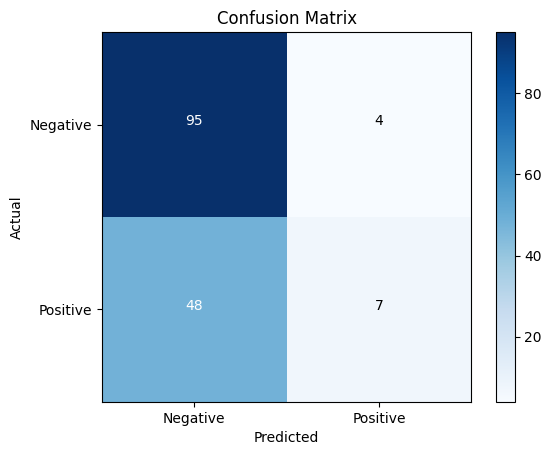

In [63]:
print("\nConfusion Matrix - L2 Regularization:")
plot_confusion_matrix(model_l2, X_test, y_test)



ROC Curve - L2 Regularization:
5/5 [==============================] - 0s 6ms/step


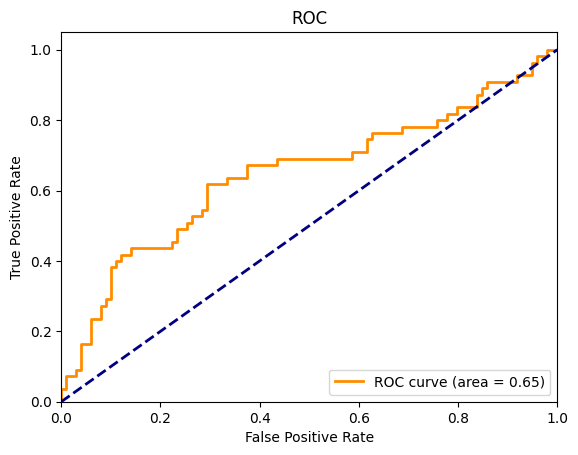

In [50]:
print("\nROC Curve - L2 Regularization:")
plot_roc_curve(model_l2, X_test, y_test)


Learning Curves - L2 Regularization:


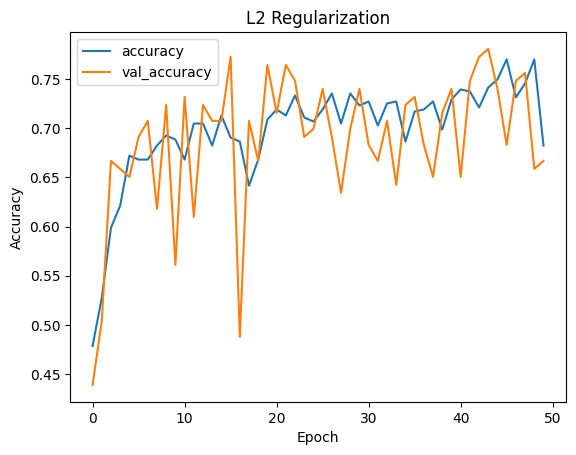

In [52]:
print("\nLearning Curves - L2 Regularization:")
plot_learning_curves(hist_l2, "L2 Regularization")

Elastic net

In [53]:
# Elastic Net regularization
model_elastic_net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model
model_elastic_net.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Train the model
hist_elastic_net = model_elastic_net.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


In [54]:
#eval
accuracy_elastic_net, precision_elastic_net, recall_elastic_net, f1_elastic_net = evaluate_model(model_elastic_net, X_test, y_test)
print("\nElastic Net Regularization:")
print("Accuracy:", accuracy_elastic_net)
print("Precision:", precision_elastic_net)
print("Recall:", recall_elastic_net)
print("F1 Score:", f1_elastic_net)

5/5 [==============================] - 0s 3ms/step

Elastic Net Regularization:
Accuracy: 0.6753246753246753
Precision: 0.5316455696202531
Recall: 0.7636363636363637
F1 Score: 0.6268656716417911



Confusion Matrix - Elastic Net Regularization:
5/5 [==============================] - 0s 3ms/step


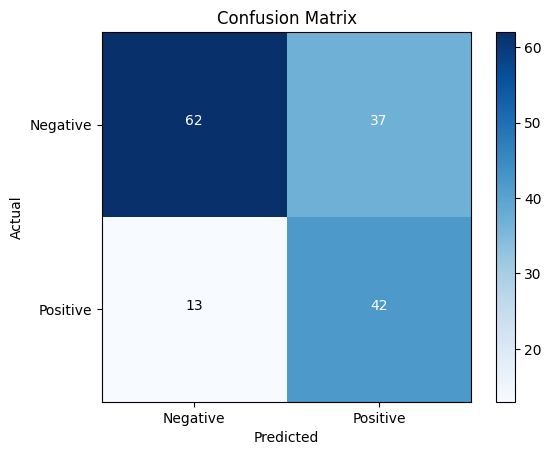

In [64]:
print("\nConfusion Matrix - Elastic Net Regularization:")
plot_confusion_matrix(model_elastic_net, X_test, y_test)


ROC Curve - Elastic Net Regularization:
5/5 [==============================] - 0s 3ms/step


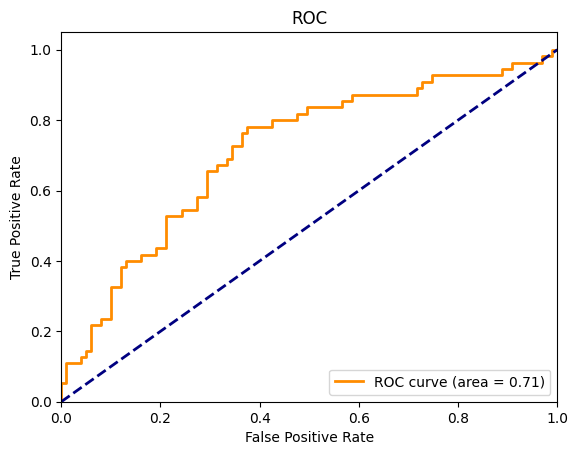

In [56]:
print("\nROC Curve - Elastic Net Regularization:")
plot_roc_curve(model_elastic_net, X_test, y_test)


Learning Curves - Elastic Net Regularization:


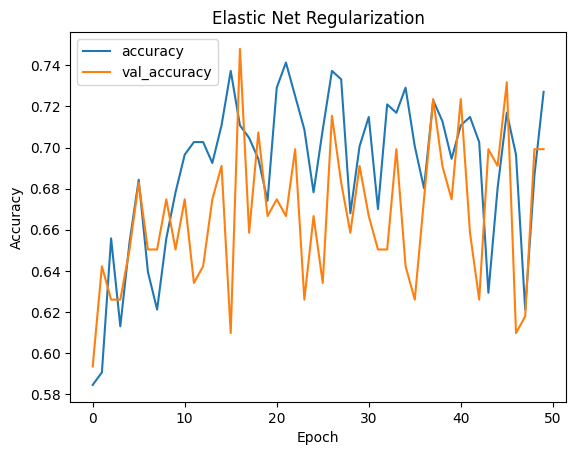

In [58]:
print("\nLearning Curves - Elastic Net Regularization:")
plot_learning_curves(hist_elastic_net, "Elastic Net Regularization")

Comparison

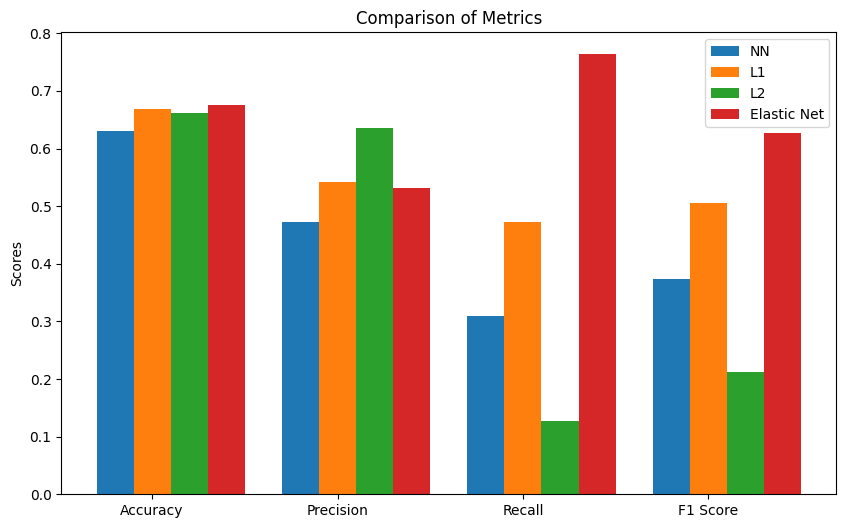

In [59]:
# Comparison of metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_nn = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
metrics_l1 = [accuracy_l1, precision_l1, recall_l1, f1_l1]
metrics_l2 = [accuracy_l2, precision_l2, recall_l2, f1_l2]
metrics_elastic_net = [accuracy_elastic_net, precision_elastic_net, recall_elastic_net, f1_elastic_net]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, metrics_nn, width, label='NN')
rects2 = ax.bar(x, metrics_l1, width, label='L1')
rects3 = ax.bar(x + width, metrics_l2, width, label='L2')
rects4 = ax.bar(x + 2*width, metrics_elastic_net, width, label='Elastic Net')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


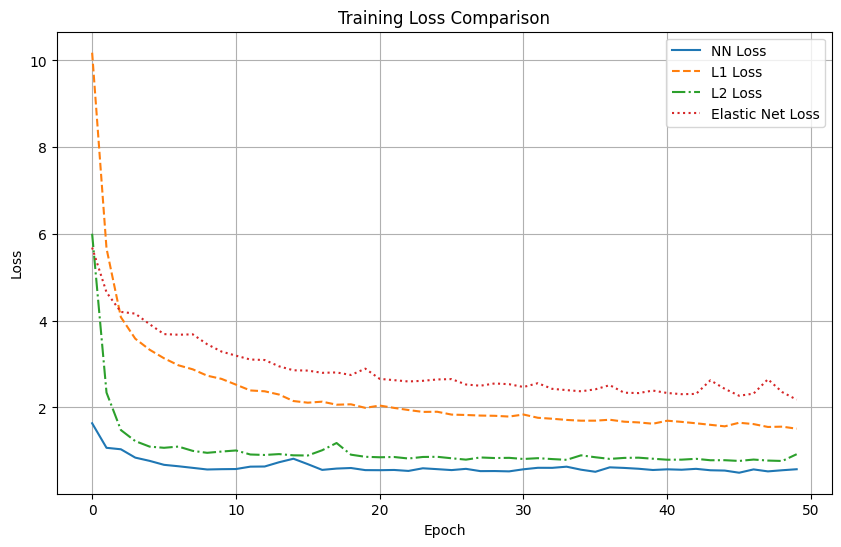

In [60]:
# Training loss comparison
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='NN Loss', linestyle='-')
plt.plot(hist_l1.history['loss'], label='L1 Loss', linestyle='--')
plt.plot(hist_l2.history['loss'], label='L2 Loss', linestyle='-.')
plt.plot(hist_elastic_net.history['loss'], label='Elastic Net Loss', linestyle=':')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
